# Smart Cart Analytics

## Sprint 1: Project Initiation

## EDA and Data Preprocessing <a id='EDA'></a>
Prepared by Dariia Vasylieva

Email: daria.vasylieva@gmail.com

November 2023

# Introduction

### The Problem Area
Grocery & Food Delivery: The grocery and food delivery business has been growing rapidly in recent years, with many customers adopting this new habit during the COVID 19 pandemic and continuing to buy food online in a post COVID world.

**Challenges and opportunities to address:**
1. **Predicting Future Purchase Behavior:** With evolving customer habits, past purchase data may not be a reliable predictor of future behavior.
2. **Demand Forecasting and Inventory Demand:** Industry growth, shifts in customer loyalty, and habits can influence demand unpredictably.
3. **Increasing Order Value:** Customers might be more open to suggestions but can also be unpredictable in their purchasing habits.

### The User
This project's insights will benefit business owners, investors, and stakeholders within the grocery and food delivery ecosystem.

### The Big Idea
Machine learning offers robust methodologies to address the identified challenges:

- **Predicting Future Purchase Behavior:** Utilizing Recommendation Systems, Clustering, Classification, and Sequence Prediction Models.
- **Demand Forecasting:** Implementing Time Series Forecasting, Regression Analysis, and Deep Learning Models.
- **Cross-Selling Products:** Leveraging Association Rule Mining, Collaborative Filtering, and Content-Based Filtering.

### The Impact
The societal and business implications are significant:

- **Demand Forecasting:** Inaccurate forecasting leads to approximately $1.1 trillion in global retailer costs annually. Improved predictions can slash these costs and boost sales by 10-20%.
- **Seasonal Forecasting:** Forecasting errors can incur up to 30% in lost sales during peak periods. Environmentally, unsold inventory, like in the fashion sector, contributes to substantial waste and CO2 emissions.
- **Cross-Selling:** Amazon reports that 35% of its revenue comes from its recommendation engine, a strategy that can translate into billions of dollars for major e-commerce platforms.

## Dataset Overview
The dataset, sourced from Instacart's "The Instacart Online Grocery Shopping Dataset 2017", part of the Kaggle community competition in 2017, comprises over 3 million grocery orders from more than 200,000 users. It includes detailed order sequences, product information, and user purchase times.

In this notebook, we delve into Exploratory Data Analysis (EDA) to extract meaningful insights, discern patterns and correlations, and spot notable trends within the data.

### Data Dictionary

Our dataset includes the following files: **orders.csv, order_products__prior.csv, order_products__train.csv, products.csv, aisles.csv, and departments.csv.** Includes the following fields:

#### Aisles:

|Features|Description |
|:------------|:------------|
| aisle_id | Unique ID for aisle |
| aisle | The name of the aisle |

#### Departments:

|Features|Description |
|:------------|:------------|
| department_id | Unique ID for department |
| department | The name of the department |

#### Products:

| Column | Description |
|:------------|:------------|
| product_id | Unique ID for a product |
| product_name | The name of the product |
| aisle_id | Aisle ID |
| department_id | Department ID |

#### Order_products_train:

|Features|Description |
|:------------|:------------|
| order_id | Unique ID for order |
| product_id | Unique ID for a product |
| add_to_cart_order | Order in which each product was added to cart |
| reordered | Indicator if the product was reordered (1) or not (0) |

#### Order_products_prior:

|Features|Description |
|:------------|:------------|
| order_id | Unique ID for order |
| product_id | Unique ID for a product |
| add_to_cart_order | Order in which each product was added to cart |
| reordered | Indicator if the product was reordered (1) or not (0) |

#### Orders:

| Features | Description |
|:------------|:------------|
| order_id | Unique ID for order |
| user_id | Unique ID for a user |
| eval_set | Which evaluation set this order belongs in |
| order_number | The order sequence number for this user |
| order_dow | The day of the week the order was placed on |
| order_hour_of_day | The hour of the day the order was placed |
| days_since_prior_order | Days since the last order was placed |

# INDEX

[EDA and Data Preprocessing](#EDA)

- [Part 1: Data Exploration](#Reading)
- [Part 2: EDA](#Part2)
- [Hyphothesis](#H)
<a id='INDEX'></a>

## Data Exploration

Reading in the data and performing any required data cleaning steps

<a id='Reading'></a>

In [5]:
 # importing required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let´s read the data and check if any cleaning should be done (sanity checks). 

#### Let´s have an overview at **Aisles** and **Departments** data sets:

In [6]:
df_aisles = pd.read_csv('data/aisles.csv')
df_aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [7]:
# Check for nulls
df_aisles.isna().sum().any()

False

In [8]:
# Check duplicate rows
df_aisles.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Length: 134, dtype: bool

There are 133 types of varied product aisles with no null values or duplicates.

In [9]:
# **Departments** data set check:
df_departments = pd.read_csv('data/departments.csv')
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [10]:
# Check for nulls
df_departments.isna().sum().any()

False

In [11]:
# Check duplicate rows
df_departments.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

There is a total of 21 rows: 20 representing various product departments, and the 21st row is for items with missing department values.

#### Let´s have an overview at **Products** data set:

In [12]:
df_products = pd.read_csv('data/products.csv')
df_products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [13]:
# Check for nulls
df_products.isna().sum().any()

False

In [14]:
# Check duplicate rows
df_products.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49683    False
49684    False
49685    False
49686    False
49687    False
Length: 49688, dtype: bool

There are 49 688 types of products with no null values or duplicates. This table **Products** can be combined with the **Isles** and **Departments**.

In [15]:
# Merge df_products with df_aisles on 'aisle_id'
df_products_aisles = pd.merge(df_products, df_aisles, on='aisle_id')

In [16]:
# Merge df_products_aisles with df_departments on 'department_id'
df_products_final = pd.merge(df_products_aisles, df_departments, on='department_id')
df_products_final

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks
...,...,...,...,...,...,...
49683,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk
49684,28655,Crystallized Ginger Chunks,18,10,bulk dried fruits vegetables,bulk
49685,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk
49686,38007,Naturally Sweet Plantain Chips,18,10,bulk dried fruits vegetables,bulk


Now, we have additional information consolidated into one table about types of 49688 products, which can be used for feature engineering or to enhance the analysis.

#### Let´s have an overview at **Order products train** and **Order products  prior** data sets:

In [17]:
df_products_train = pd.read_csv('data/order_products__train.csv')
df_products_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In **order_products__train** there are 1,384,616 rows containing information about products from 3,421,070 orders, with a total of 49,688 unique product IDs. It also indicates the order in which the item was added to the cart and whether it was reordered or not (1/0).

In [48]:
# Check for nulls
df_products_train.isna().sum().any()

False

In [49]:
# Check duplicate rows
df_products_train.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1384612    False
1384613    False
1384614    False
1384615    False
1384616    False
Length: 1384617, dtype: bool

The train data sets are typically used for training machine learning models. It contains data about the orders, specifically which products were purchased in each order.
In our case we do not have provided **"order_products__test"** data set, therefore, later we will split **"order_products__train"** into training and validation sets for model selection and hyperparameter tuning.

#### Let´s have an overview at **Order products  prior** data set:

In [40]:
df_order_products_prior = pd.read_csv('data/order_products__prior.csv')
df_order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


We can see that this dataset is substantially larger (32,434,488 rows versus 1,384,616 rows), which makes sense as it contains all the historical data.

These rows have the same columns as the previous dataset: they contain information about products from 3,421,083 orders, with a total of 49,688 unique product IDs. It also indicates the order in which the item was added to the cart and whether it was reordered or not (1/0).

In [73]:
df_order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [78]:
# Set the display option for float format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df_order_products_prior.describe()

,order_id,product_id,add_to_cart_order,reordered
count,32434489.000,32434489.000,32434489.000,32434489.000
mean,1710748.519,25576.338,8.351,0.590
std,987300.696,14096.689,7.127,0.492
min,2.000,1.000,1.000,0.000
25%,855943.000,13530.000,3.000,0.000
50%,1711048.000,25256.000,6.000,1.000
75%,2565514.000,37935.000,11.000,1.000
max,3421083.000,49688.000,145.000,1.000


order_id: The **order_id** ranges from 2 to 3,421,083 with a mean of approximately 1,710,749 - our data set is correct and clean, the orders are evenly distributed throughout the dataset.

product_id: The **product_id** has values ranging from 1 to 49,688, indicating a wide variety of products. The mean product ID is about 25,576, and the standard deviation is large (14,097), suggesting there is a wide distribution in the popularity of products.

add_to_cart_order: On average, products are added as the 8.35th item in the cart, but this varies with a standard deviation of about 7.13. The max value of 145 indicates that there are some orders with a lot of items. Since the median (50%) is 6, most orders have fewer items, and the distribution is right-skewed with some very large orders.

reordered: The **reordered** column, which is binary, shows that about 59% of the products in the dataset are reorders. There is a strong tendency for items to be reordered.

Quartile information for **add_to_cart_order** shows that at least **25%** of products are added to the cart in the first 3 positions, and at least 75% are added within the first 11 positions, indicating that most products are added to the cart relatively early in the shopping session.

In [41]:
# Check for nulls
df_order_products_prior.isna().sum().any()

False

In [42]:
# Check duplicate rows
df_order_products_prior.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
32434484    False
32434485    False
32434486    False
32434487    False
32434488    False
Length: 32434489, dtype: bool

**"Prior orders"** for a given set of users are their previous historical orders excluding their latest orders (which are found in the "train"). This is the largest set of order data. This data can be used to train predictive models to predict future purchasing behavior based on a user's purchase history.

The **"prior"** dataset is crucial for understanding the patterns and habits of users over time, which can be essential for tasks such as creating recommendation systems or forecasting demand. It's one of the key datasets we should use to gain insights into customer behavior and to build features that could help us to predict future activity.

## Part 2: EDA
<a id='Part2'></a>

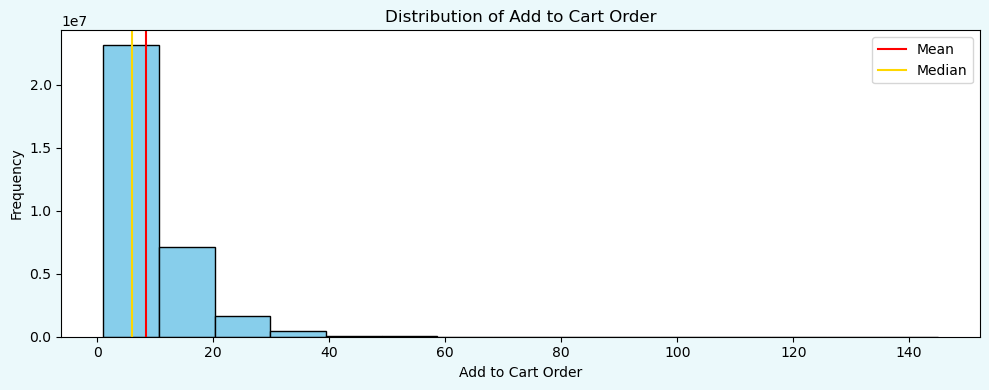

In [69]:
# Let's take a look at the distribution of these columns in detail.
# Let's visualize the data to get an idea of it:

# Create a histogram for the 'add_to_cart_order' column
plt.figure(figsize=(10, 4)) 
plt.hist(df_order_products_prior['add_to_cart_order'], bins=15, color='skyblue', edgecolor='black')
plt.gcf().set_facecolor('#EBF9FB') 

# Set the titles and labels
plt.ylabel("Frequency")
plt.xlabel('Add to Cart Order')
plt.title('Distribution of Add to Cart Order')

# Adding median and mean lines
plt.axvline(df_order_products_prior['add_to_cart_order'].mean(), color="red", label="Mean")
plt.axvline(df_order_products_prior['add_to_cart_order'].median(), color="gold", label="Median")
plt.legend()
plt.tight_layout()

Add to Cart Order Data has many outliers with a long tail to the right, indicating a right-skewed distribution. We can log transform later **Add to Cart Order** distribution.

In [55]:
# Create the bar chart for binary column Reordered:
# Group the data by 'Product id' and sum 'Reordered' value:
reordered_status = df_order_products_prior.groupby('reordered')['product_id'].sum()
reordered_status


reordered
0    339532546472
1    490022891981
Name: product_id, dtype: int64

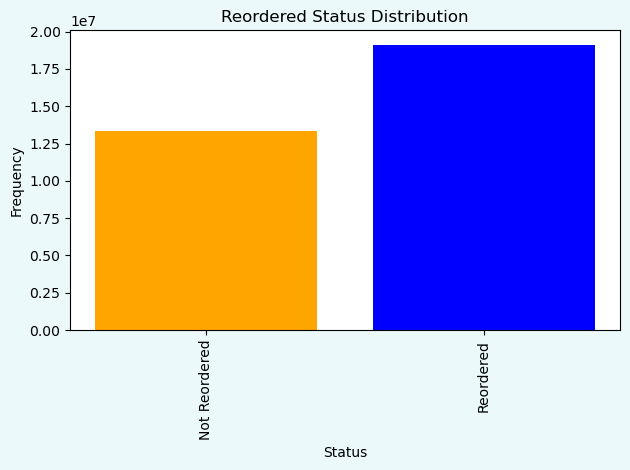

In [62]:
plt.figure()
plt.bar(reordered_status.index, reordered_status.values, color=['blue', 'orange'])

# Adding title and labels
plt.title('Reordered Status Distribution')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.gcf().set_facecolor('#EBF9FB')
plt.xticks(ticks=reordered_status.index, labels=['Reordered', 'Not Reordered'], rotation='horizontal')
plt.xticks(rotation='vertical')
plt.tight_layout()

On this graph we can visually observe that approximately 59% of the products in the dataset are marked as reorders (36% more than not reordered). There is a clear tendency for items to be reordered.

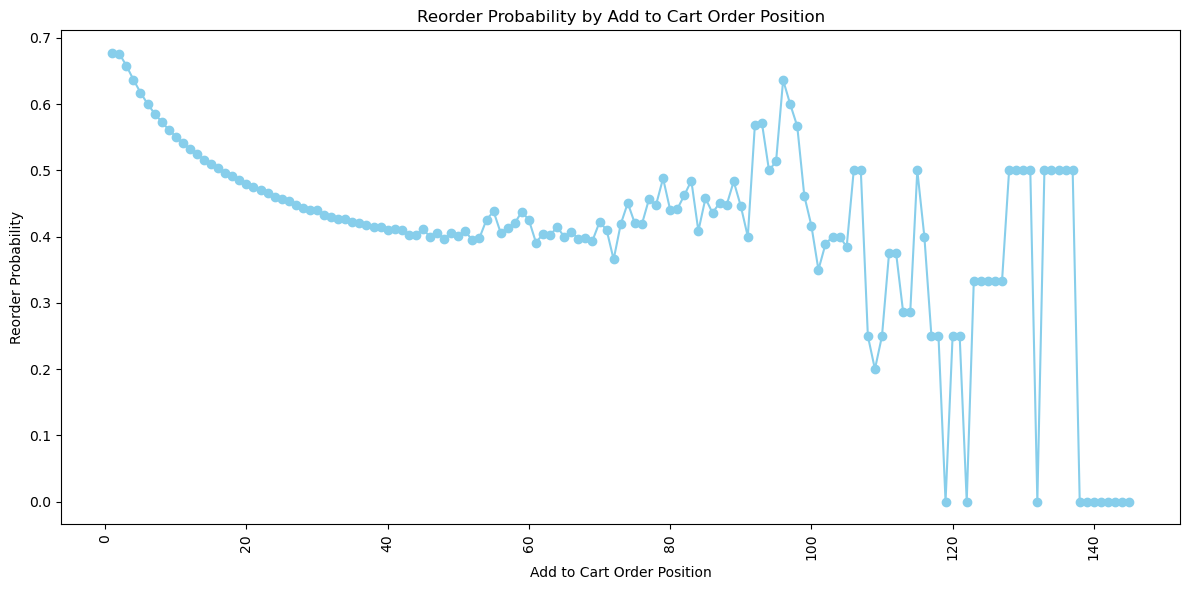

In [77]:
# Calculate the reorder probability for each add_to_cart_order
reorder_prob_by_add_to_cart = df_order_products_prior.groupby('add_to_cart_order')['reordered'].mean()

# Create a bar chart for better visibility if there are many unique add_to_cart_order positions
plt.figure(figsize=(12, 6))
reorder_prob_by_add_to_cart.plot(kind='line', color='skyblue', marker='o')

# Set titles and labels
plt.title('Reorder Probability by Add to Cart Order Position')
plt.xlabel('Add to Cart Order Position')
plt.ylabel('Reorder Probability')
plt.xticks(rotation=90) 

plt.tight_layout()

From the visualization, it can be observed that:

-The reorder probability starts high when items are added first to the cart and generally declines as the add-to-cart order position increases.

-There is a notable decline in reorder probability from the first to subsequent positions, with a more gradual decline following the initial positions.

-There is a notable spike around 90th position in the cart order (almost as high as the third position item in the cart).

-At the very high end of the add-to-cart order positions (beyond 100), the graph shows a pattern of spikes where the probability shoots up to higher levels at specific positions. These could be due to less frequent, but consistent reordering of certain niche items in really big orders.

#### Let´s have an overview at **Orders** data set:

In [22]:
df_orders = pd.read_csv('data/orders.csv')

In [39]:
df_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


The data includes observations related to orders realized by users with the **ID information** of the user and their **order**, **Day of the week** when the order was realized, **hour of day** and the number of **days since prior order**. No outliers or wrong data stand out above as it is a clean data set.

What categorical data is stored: How is it distributed:

In [31]:
df_orders["eval_set"].value_counts()

eval_set
prior    3008665
train     131209
test       75000
Name: count, dtype: int64

The data set contains numerical and categorical data. Column **"eval_set"** contains prior, train and test data.

The **prior set** is used for feature engineering and understanding historical customer behavior.

The **train set** is used to train machine learning models to predict future behavior based on historical data.

The **test set** is used to evaluate the performance of the models in predicting unseen data. The actual labels for this set are usually withheld in a competition setting to test the model's predictive power. 

The NaN value in the column **days_since_prior_order** suggests it's the user's first order or the data for the prior order is not available.

In [24]:
df_orders.isna().sum().any()

True

In [25]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [26]:
# Check duplicate rows
df_orders.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Length: 3421083, dtype: bool

In [27]:
df_orders.duplicated().sum()

0

In [28]:
# Check for nulls
df_orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

The only column with null values is ¨Days since prior order¨. These are the users that did not have prior orders on the platform. Lets see the percentage of the null values:

In [29]:
df_orders.isna().mean()*100

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.027594
dtype: float64

For now, lets drop the null values for the numeric analysis:

In [30]:
df_orders = df_orders.dropna()

In [79]:
# Set the display option for float format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3214874.000,3214874.000,3214874.000,3214874.000,3214874.000,3214874.000
mean,1710675.426,102970.075,18.191,2.778,13.441,11.115
std,987546.573,59534.113,17.799,2.045,4.226,9.207
min,1.000,1.000,2.000,0.000,0.000,0.000
25%,855547.250,51385.000,6.000,1.000,10.000,4.000
50%,1710834.500,102662.000,12.000,3.000,13.000,7.000
75%,2565904.750,154372.000,25.000,5.000,16.000,15.000
max,3421083.000,206209.000,100.000,6.000,23.000,30.000


order_number: The average (mean) **order number** is 18.191, which implies that on average, users have placed around 18 orders. The standard deviation is relatively high at 17.799, indicating a wide variation in the number of orders per user. The maximum number of orders placed by a single user is 100, pointing to some very active users.

order_dow (day of the week): Orders are placed every day of the week, with values from 0 to 6 (0 for Sunday). The mean close to 3 suggests a uniform distribution across the week with a slight peak around midweek.

order_hour_of_day: Orders are placed at all hours, with the mean at around 13:00 (1 PM). The hours range from 0 to 23, covering all times during the day.

days_since_prior_order: On average, there are 11.115 days between orders. The standard deviation is 9.207 days, indicating variability in how frequently customers reorder. A maximum of 30 days suggests that there may be a cap on the recorded value.

The quartiles (25%, 50%, 75%) provide additional insights:

For **order_number**, half of the orders are placed by users by their 12th order, and 75% of orders are within a user's first 25 orders.
The **order_hour_of_day** quartiles show that most orders are placed between 10 AM and 4 PM.
The **days_since_prior_order** quartiles suggest that a significant portion of orders is made within one week of the previous order, with 25% of reorders made within 4 days or less.

### Exploring the data

Let's take a look at the distribution of these columns in detail.
Let's visualize the data to get an idea of it:

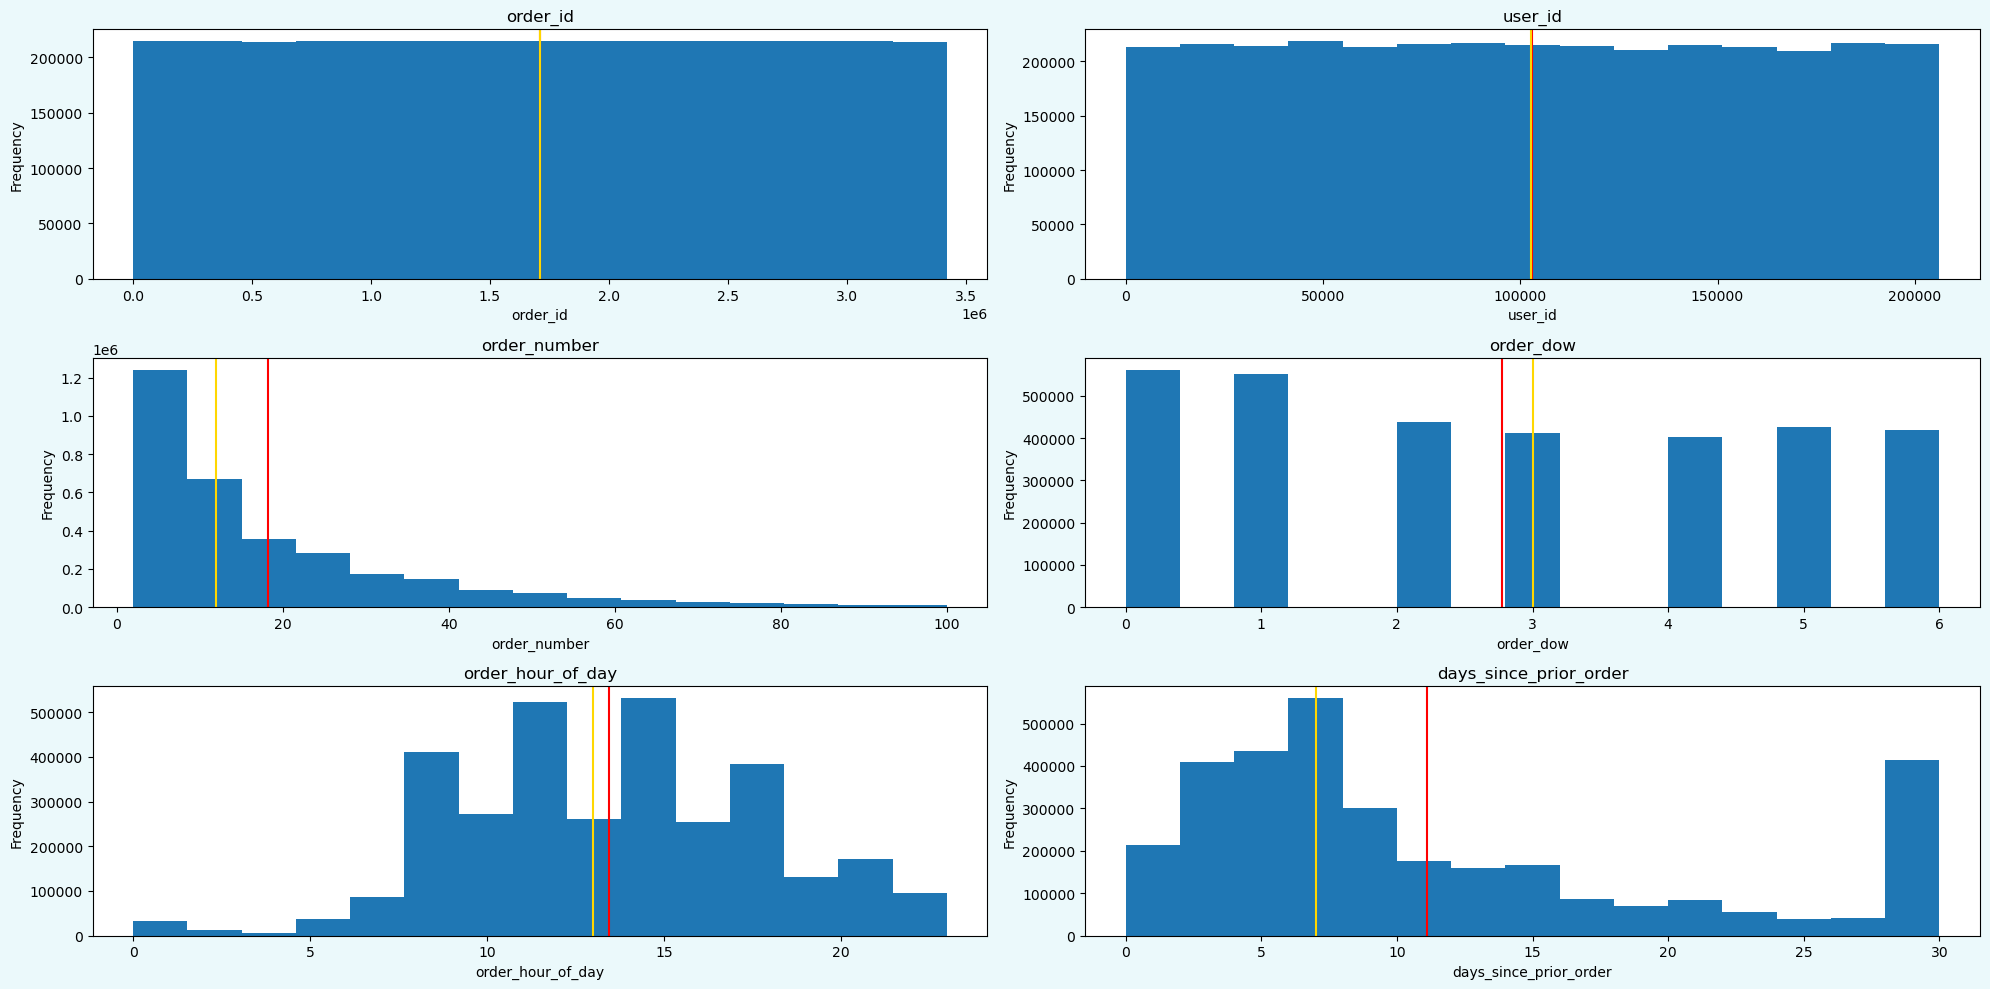

In [35]:
# We will be making 3 rows x 2 columns of subplots
plt.subplots(3,2, figsize=(20,10))

# Creating the for loop
for slot_num, column in enumerate(numeric_df_orders.columns, start=1):
    # Creating a hist for every iteration
    plt.subplot(3,2, slot_num)
    plt.hist(numeric_df_orders[column], bins=15)
    plt.gcf().set_facecolor('#EBF9FB')

    # Set the titles and labels
    plt.ylabel("Frequency")
    plt.xlabel(column)
    plt.title(column)

    # Adding median and mean lines
    plt.axvline(numeric_df_orders[column].mean(), c="red", label="mean")
    plt.axvline(numeric_df_orders[column].median(), c="gold", label="median")
    
plt.tight_layout()

Histograms can help us to understand ordering habits of customers, such as how frequently they order, which days of the week are busiest, and what times of day are most popular for placing orders:

order_number Histogram: There's a right-skew data, indicating that first-time orders are most common, with the frequency decreasing as the order number increases. We can apply log transformation later.

order_dow (day of week) Histogram: Orders are fairly evenly distributed throughout the week, with a slight increase for the day 0 and 1 (Sunday and Monday).

order_hour_of_day Histogram: There are some peaks, during the daytime hours, indicating when customers are most active in placing orders.

days_since_prior_order Histogram: There's a noticeable peak at the 7-day mark, which might indicate that many customers place orders on a weekly basis. There's also a significant peak at the 30-day mark, suggesting a monthly ordering pattern for some customers.

### What is the average number of orders for each hour? What trends can we notice?

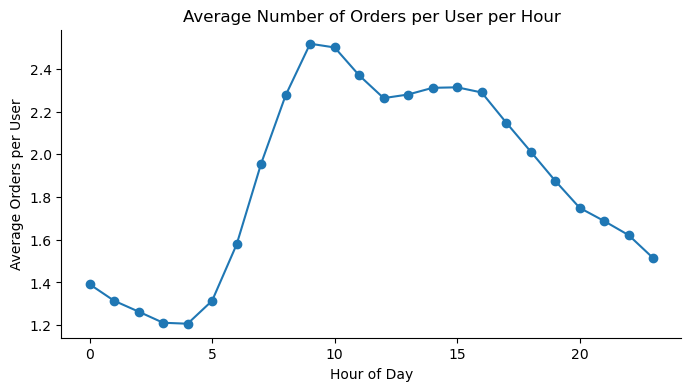

In [94]:
# Grouping by 'order_hour_of_day' and 'user_id' and then counting the number of orders
hourly_orders = numeric_df_orders.groupby(['order_hour_of_day', 'user_id']).size().reset_index(name='order_count')

# Now, to get the average number of orders per hour per user, group by 'order_hour_of_day' and calculate the mean of 'order_count'.
av_hourly_per_user = hourly_orders.groupby('order_hour_of_day')['order_count'].mean()

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(av_hourly_per_user.index, av_hourly_per_user.values, marker='o')

# Label the axes and add a title
plt.xlabel('Hour of Day')
plt.ylabel('Average Orders per User')
plt.title('Average Number of Orders per User per Hour')
sns.despine()  

A clear peak is observed in the morning hours,with the highest point around 9am and 11am, suggesting that users tend to place the most orders during this time. This peak could be indicative of users ordering groceries for the day or taking advantage of early morning time slots. The average then gradually declines as the day progresses, reaching its lowest point in the late evening hours.

### What is the average number of orders for each day of the week? What trends can we notice?


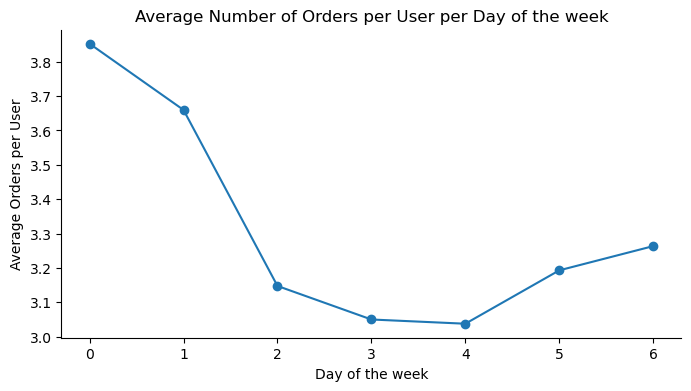

In [95]:
# Grouping by 'order_hour_of_day' and 'user_id' and then counting the number of orders
weekly_orders = numeric_df_orders.groupby(['order_dow', 'user_id']).size().reset_index(name='order_count')

# Now, to get the average number of orders per hour per user, group by 'order_hour_of_day' and calculate the mean of 'order_count'.
av_weekly_per_user = hourly_orders.groupby('order_dow')['order_count'].mean()

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(av_hourly_per_user.index, av_hourly_per_user.values, marker='o')

# Label the axes and add a title
plt.xlabel('Day of the week')
plt.ylabel('Average Orders per User')
plt.title('Average Number of Orders per User per Day of the week')
sns.despine()  

Sunday is the most popular day for orders, with a gradual decrease leading to the lowest numbers on Wednesday and Thursday, followed by a slow increase towards the end of the week.

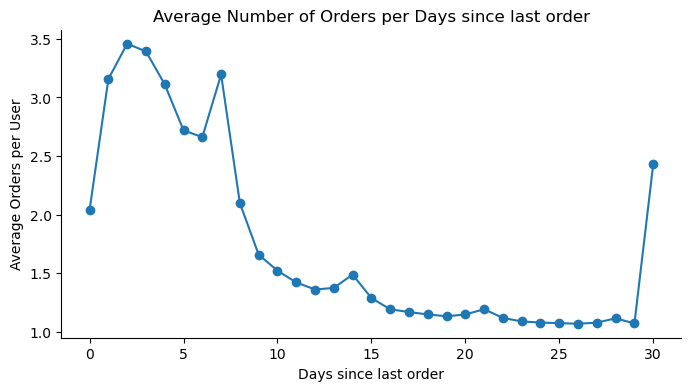

In [97]:
# Grouping by 'order_hour_of_day' and 'user_id' and then counting the number of orders
last_order_day = numeric_df_orders.groupby(['days_since_prior_order', 'user_id']).size().reset_index(name='order_count')

# Now, to get the average number of orders per hour per user, group by 'order_hour_of_day' and calculate the mean of 'order_count'.
av_hourly_per_user = last_order_day.groupby('days_since_prior_order')['order_count'].mean()

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(av_hourly_per_user.index, av_hourly_per_user.values, marker='o')

# Label the axes and add a title
plt.xlabel('Days since last order')
plt.ylabel('Average Orders per User')
plt.title('Average Number of Orders per Days since last order')
sns.despine()  

There's an initial peak at around the 3-day mark, indicating that users are likely to place more orders if a few days have passed since their last order.
The graph then shows a downward trend until approximately day 10, suggesting a decrease in the average number of orders as more days elapse.
After day 10, the average number of orders stabilizes with minor fluctuations until it reaches day 30, where there's a significant spike, indicating a substantial increase in the average number of orders placed after a month has passed since the last order.

To continue with the statistical analysis, we will split the **order** dataset by matching its **eval_set** categories with the **df_products_train** and **df_products_prior** datasets. The **df_products_test** dataset was not provided by the company to prevent data leakage.

# Hyphotheses
<a id='H'></a>

When conducting further analysis on our Instacart Market Basket dataset, we can already formulate several hypotheses:

1. **Reorder Frequency Hypothesis**:
   - Products with lower add-to-cart order positions have a higher probability of being reordered.
   - Certain days of the week or times of day have higher reorder rates due to routine shopping habits.

2. **Product Popularity Hypothesis**:
   - Some aisles or departments have a significantly higher number of reorders, indicating more popular or essential items.
   - The variety of products in a user's order decreases with the number of orders, suggesting users settle into buying familiar items.

3. **Customer Segmentation Hypothesis**:
   - Customers can be segmented into distinct groups based on their reorder patterns, with some segments showing a higher propensity for trying new products.
   - The frequency of orders is indicative of customer segments; for example, frequent shoppers might have different buying patterns compared to infrequent shoppers.

4. **Order Size Hypothesis**:
   - Larger order sizes are correlated with a lower probability of item reorders due to the diversity of items in a single order.
   - Smaller orders are more likely to contain items that are frequently reordered.

5. **Product Association Hypothesis**:
   - There are strong association rules between certain products, suggesting that if a customer buys one product, they are likely to buy another related product.

6. **User Behavior Hypothesis**:
   - New users have different purchasing patterns compared to established users, such as trying a wider variety of products before establishing a routine.

7. **Product Lifecycle Hypothesis**:
   - Products have a lifecycle, with new products having a different reorder pattern compared to established products.

 These hypotheses serve us as starting points for in-depth analysis. We will continue investigating, with the usage of data visualization tools, appropriate statistical tests, and applying a machine learning models on the data set.

### [BACK TO INDEX](#INDEX)